In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Bước 1: Tải và tiền xử lý dữ liệu
file_path = '/kaggle/input/dataset/data-kiem-tra-2.csv' 
data = pd.read_csv(file_path)

# Chuyển đổi cột 'date' sang định dạng datetime
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')

# Kiểm tra giá trị thiếu
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Chuẩn hóa các cột số liệu
scaler = StandardScaler()
data[['truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5']] = scaler.fit_transform(
    data[['truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5']]
)

# Bước 2: Kiểm tra trùng lặp ngày
duplicated_dates = data['date'].duplicated().sum()
print(f"Number of duplicated dates: {duplicated_dates}")

# Tính trung bình các giá trị cho mỗi ngày trùng lặp
data_aggregated = data.groupby('date').mean().reset_index()

# Kiểm tra lại dữ liệu sau khi loại bỏ các trùng lặp và tính trung bình
print(f"Data after aggregating duplicates:\n{data_aggregated.head()}")

# Thiết lập cột 'date' làm chỉ số
data_aggregated.set_index('date', inplace=True)

# Kiểm tra tính liên tục của dữ liệu
all_dates = pd.date_range(start=data_aggregated.index.min(), end=data_aggregated.index.max(), freq='D')
missing_dates = all_dates.difference(data_aggregated.index)

print(f"Missing dates:\n{missing_dates}")

# Điền giá trị bị thiếu
data_filled = data_aggregated.reindex(all_dates).fillna(method='ffill')

# Kiểm tra lại dữ liệu sau khi điền giá trị bị thiếu
print("Data after filling missing values:")
print(data_filled.head(10))

# Chuẩn hóa lại các cột số liệu sau khi điền giá trị bị thiếu
data_filled[['truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5']] = scaler.fit_transform(
    data_filled[['truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5']]
)



Missing values:
date        0
truong_1    0
truong_2    0
truong_3    0
truong_4    0
truong_5    0
dtype: int64
Number of duplicated dates: 549824
Data after aggregating duplicates:
        date  truong_1  truong_2  truong_3  truong_4  truong_5
0 2013-05-01 -1.785036 -0.224808 -0.007645 -0.078485 -0.074506
1 2013-05-02 -1.785036 -0.190042  0.037138 -0.072496 -0.070146
2 2013-05-03 -1.785036 -0.187567 -0.025286 -0.043853 -0.081470
3 2013-05-04 -1.785036 -0.126539 -0.022079 -0.092166 -0.086247
4 2013-05-05 -1.785036 -0.106864  0.107089 -0.124855 -0.092037
Missing dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')
Data after filling missing values:
            truong_1  truong_2  truong_3  truong_4  truong_5
2013-05-01 -1.785036 -0.224808 -0.007645 -0.078485 -0.074506
2013-05-02 -1.785036 -0.190042  0.037138 -0.072496 -0.070146
2013-05-03 -1.785036 -0.187567 -0.025286 -0.043853 -0.081470
2013-05-04 -1.785036 -0.126539 -0.022079 -0.092166 -0.086247
2013-05-05 -1.785036 -0.106864  

/tmp/ipykernel_34/2418028492.py:46: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data_aggregated.reindex(all_dates).fillna(method='ffill')


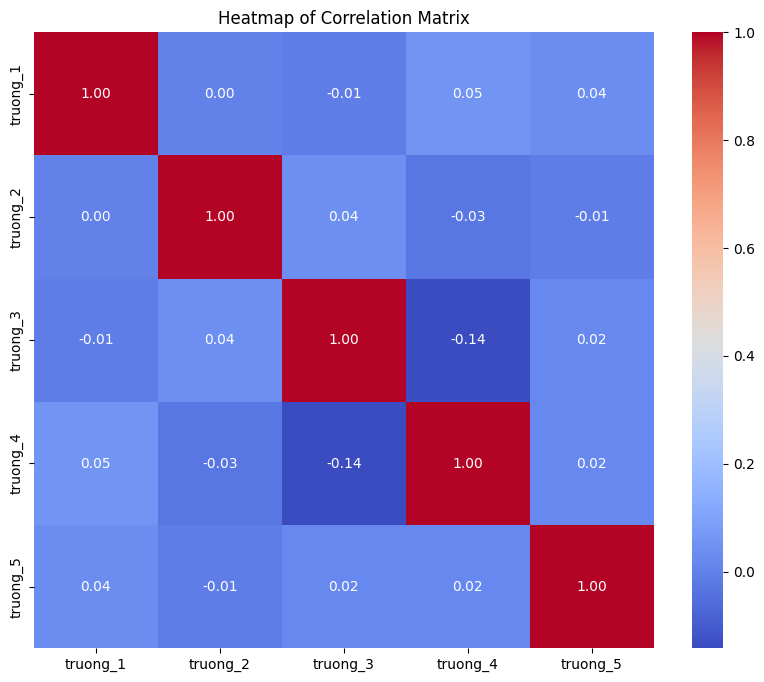

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan
corr_matrix = data[['truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5']].corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
from hmmlearn import hmm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


X = data_filled[['truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5']].values

# Chia tập train/test
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
# Tạo một GridSearchCV object
parameters = {'n_components': [3, 4, 5], 'covariance_type': ['spherical', 'diag', 'full'], 'n_iter': [500, 1000, 1500]}
model = hmm.GaussianHMM()
clf = GridSearchCV(model, parameters, cv=5)

# Thực hiện tìm kiếm trên tập dữ liệu
clf.fit(X_train)

# In ra bộ tham số tốt nhất
print("Best parameters found:")
print(clf.best_params_)




Best parameters found:
{'covariance_type': 'diag', 'n_components': 4, 'n_iter': 1500}


R2 score on test set for truong_4: 0.7930411164287194
MAE score on test set for truong_4: 0.3440081013237941
MSE score on test set for truong_4: 0.20441369709083104
RMSE score on test set for truong_4: 0.45212133005514243


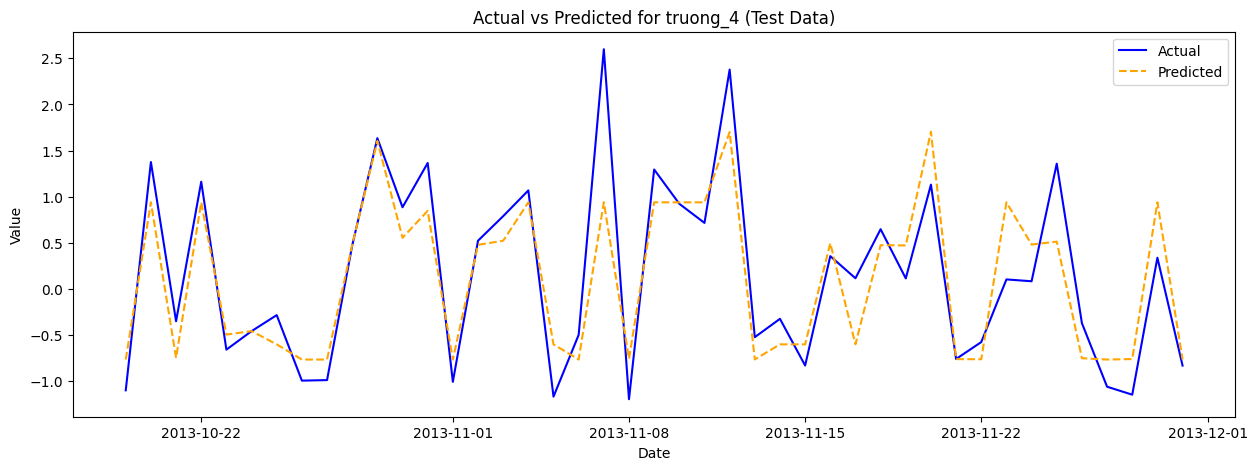

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Bước 1: Chia tập train/test
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Bước 2: Huấn luyện mô hình HMM trên tập train
model = hmm.GaussianHMM(n_components=5, covariance_type='diag', n_iter=1500)
model.fit(X_train)

# Dự đoán trên tập test
hidden_states_test = model.predict(X_test)

# Tính toán các giá trị dự đoán bằng cách sử dụng trung bình của mỗi trạng thái ẩn
predicted_values_test = np.dot(model.predict_proba(X_test), model.means_)

# Đánh giá mô hình trên tập test cho trường_4
r2_score_truong_4_test = r2_score(X_test[:, 3], predicted_values_test[:, 3])
mae_score_truong_4_test = mean_absolute_error(X_test[:, 3], predicted_values_test[:, 3])
mse_score_truong_4_test = mean_squared_error(X_test[:, 3], predicted_values_test[:, 3])
rmse_score_truong_4_test = np.sqrt(mse_score_truong_4_test)

print("R2 score on test set for truong_4:", r2_score_truong_4_test)
print("MAE score on test set for truong_4:", mae_score_truong_4_test)
print("MSE score on test set for truong_4:", mse_score_truong_4_test)
print("RMSE score on test set for truong_4:", rmse_score_truong_4_test)

# Dự đoán giá trị trên tập test
predicted_values_test = np.dot(model.predict_proba(X_test), model.means_)

# Vẽ biểu đồ
plt.figure(figsize=(15, 5))
plt.plot(data_filled.index[X_train.shape[0]:], X_test[:, 3], label='Actual', color='blue')
plt.plot(data_filled.index[X_train.shape[0]:], predicted_values_test[:, 3], label='Predicted', linestyle='--', color='orange')
plt.title('Actual vs Predicted for truong_4 (Test Data)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


LSTM

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13751/13751 ━━━━━━━━━━━━━━━━━━━━ 60s 4ms/step - loss: 0.9867
Epoch 2/10
13751/13751 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 0.9713
Epoch 3/10
13751/13751 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 0.9590
Epoch 4/10
13751/13751 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 0.9237
Epoch 5/10
13751/13751 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 0.8052
Epoch 6/10
13751/13751 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 0.7676
Epoch 7/10
13751/13751 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 0.7709
Epoch 8/10
13751/13751 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 0.7310
Epoch 9/10
13751/13751 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 0.6924
Epoch 10/10
13751/13751 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 0.7008
Test Loss: 0.9151198267936707
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
R2 score: 0.0508
MAE: 0.4426
MSE: 0.9151
RMSE: 0.9566


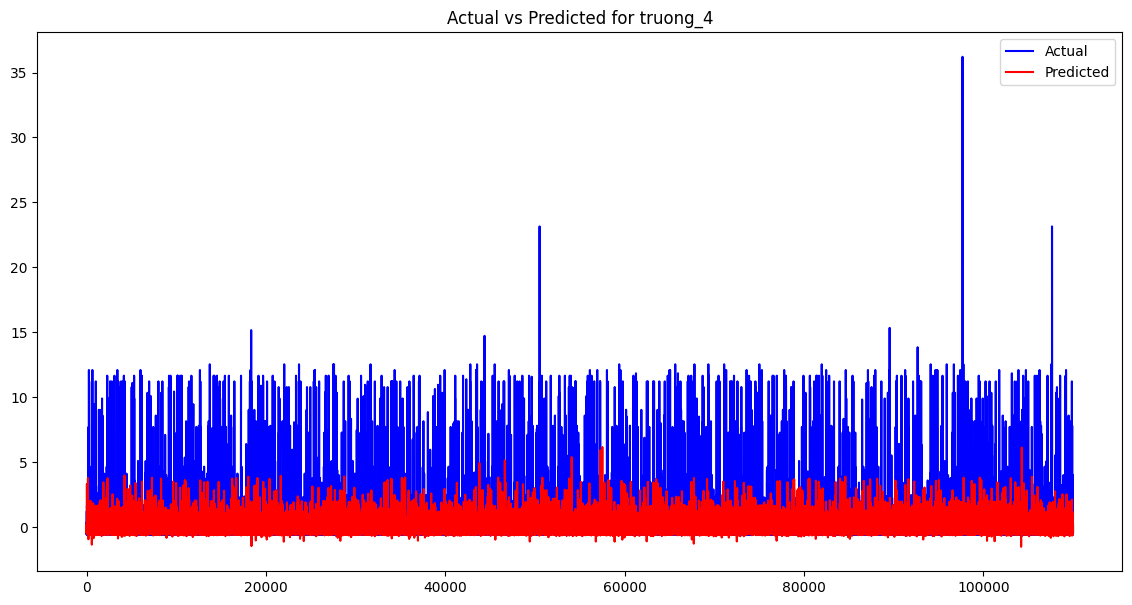

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Giả sử 'data' đã được đọc và xử lý từ file CSV

# Chia tập train/test
X = data[['truong_1', 'truong_2', 'truong_3', 'truong_5']].values
y = data[['truong_4']].values

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data để phù hợp với đầu vào của mạng LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Đánh giá mô hình trên tập test
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

# Dự đoán trên tập test
predictions = model.predict(X_test)

# Tính toán các độ đo đánh giá
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"R2 score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# Vẽ biểu đồ so sánh giữa giá trị thực và giá trị dự đoán trên tập test
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted for truong_4')
plt.legend()
plt.show()
